In [9]:
%matplotlib inline

from collections import defaultdict
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def read_dump(filename, target_mode):
    raw_data = None
    with open(filename, 'r') as f:
        raw_data = f.read()
    mode = None
    position = 0
    ret = defaultdict(dict)
    for line in raw_data.splitlines():
        if line.startswith('mode:'):
            mode = line.split()[-1]
            continue
        if line.startswith('VGMSmplPos'):
            position = int(line.split()[-1])
            continue
        if mode != target_mode:
            continue
        key, value = line.split()
        value = int(value)
        ret[position][key] = value
    return ret

In [11]:
data = read_dump('example.txt', 'snd_1')

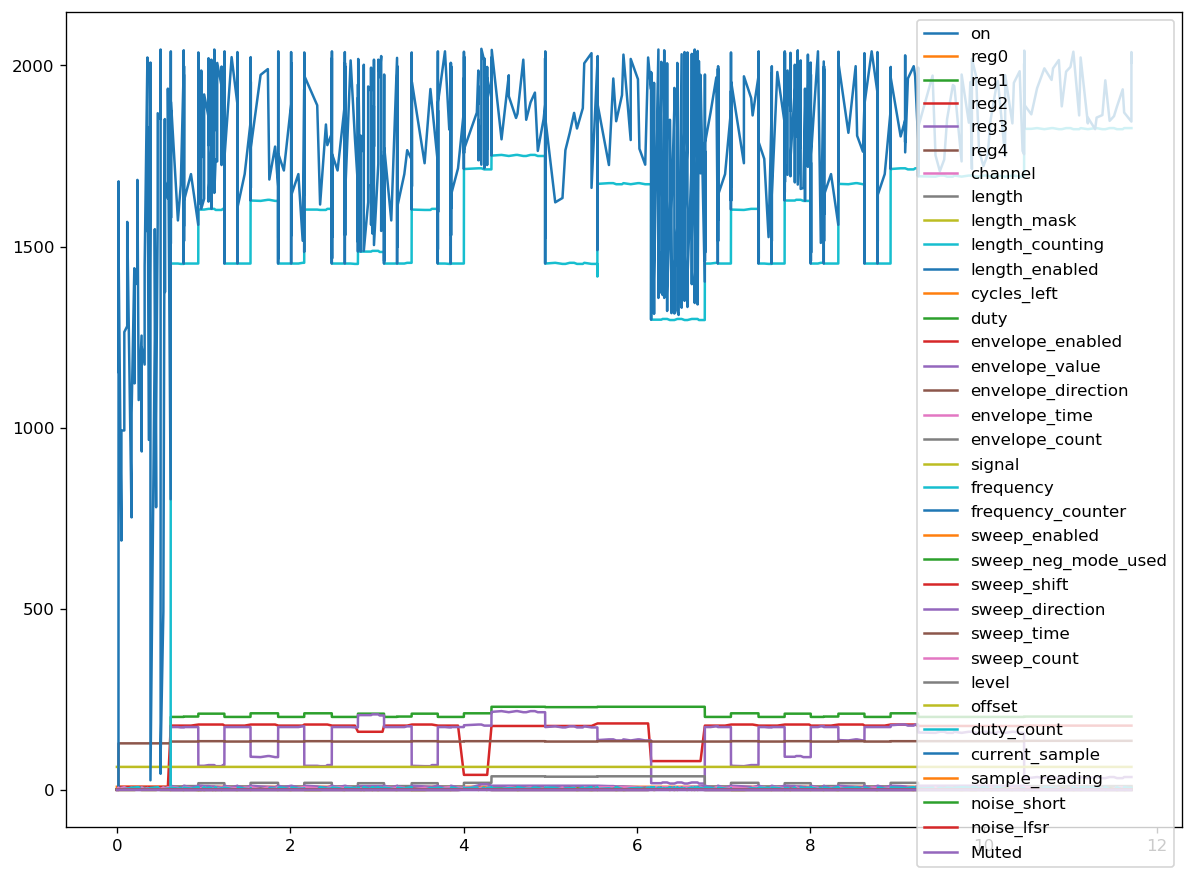

In [12]:
plt.figure(figsize=(12,9), dpi=120)
xs = list(data.keys())
for attribute in data[0].keys():
    if attribute == 'cycles':
        continue
    ys = [data[x][attribute] for x in xs]
    plt.plot([x/44100 for x in xs], ys, label=attribute)
plt.legend()